In [165]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import json

In [166]:
game_data = pd.read_csv('test2.csv')

In [167]:
posRate = pd.DataFrame(game_data['Positive']) 
negRate = pd.DataFrame(game_data['Negative']) 
price = pd.DataFrame(game_data['Price']) 
rate_price = pd.DataFrame(game_data[["Positive", "Negative", "Price"]])

In [168]:
rate_price.describe().round(2)

,Positive,Negative,Price
count,67138.00,67138.00,67138.00
mean,1178.77,193.51,7.40
std,27335.24,5141.36,10.95
min,0.00,0.00,0.00
25%,2.00,0.00,0.99
50%,11.00,3.00,4.99
75%,66.00,20.00,9.99
max,5764420.00,895978.00,999.00


<AxesSubplot:>

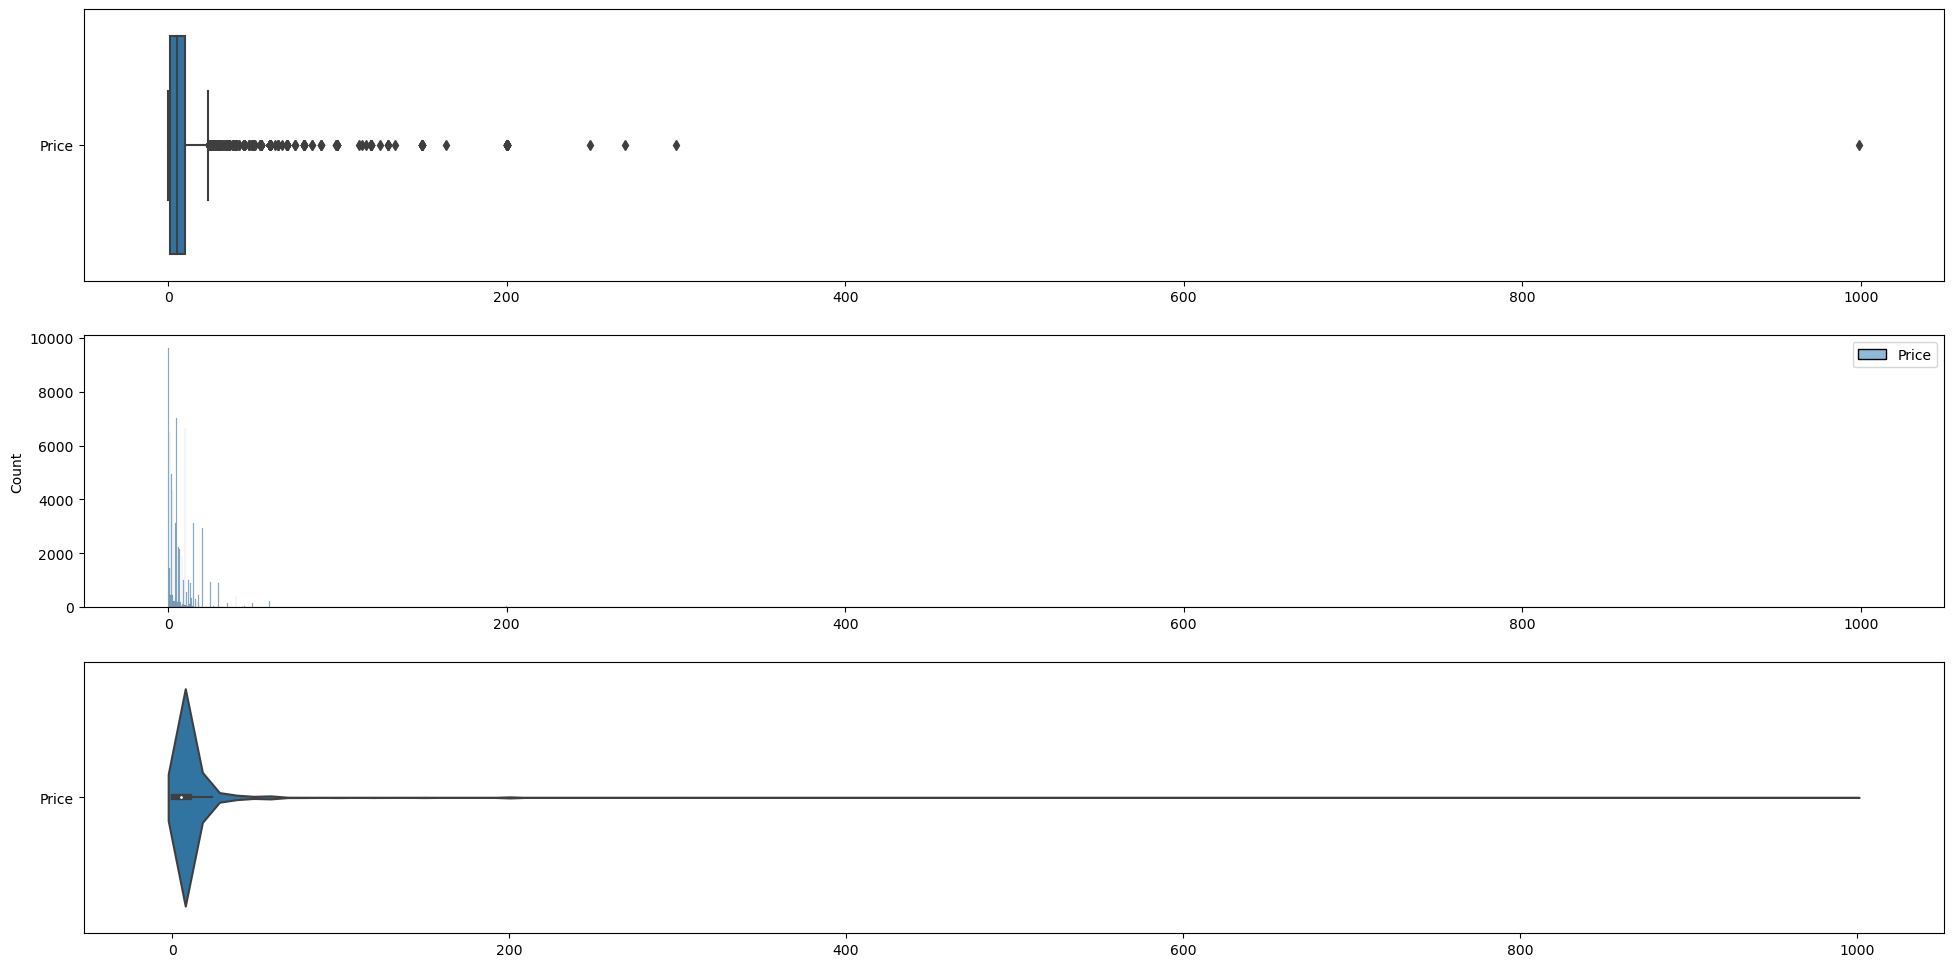

In [169]:
f, axes = plt.subplots(3, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = price, orient = "h", ax = axes[0])
sb.histplot(data = price, ax = axes[1])
sb.violinplot(data = price, orient = "h", ax = axes[2])

<AxesSubplot:>

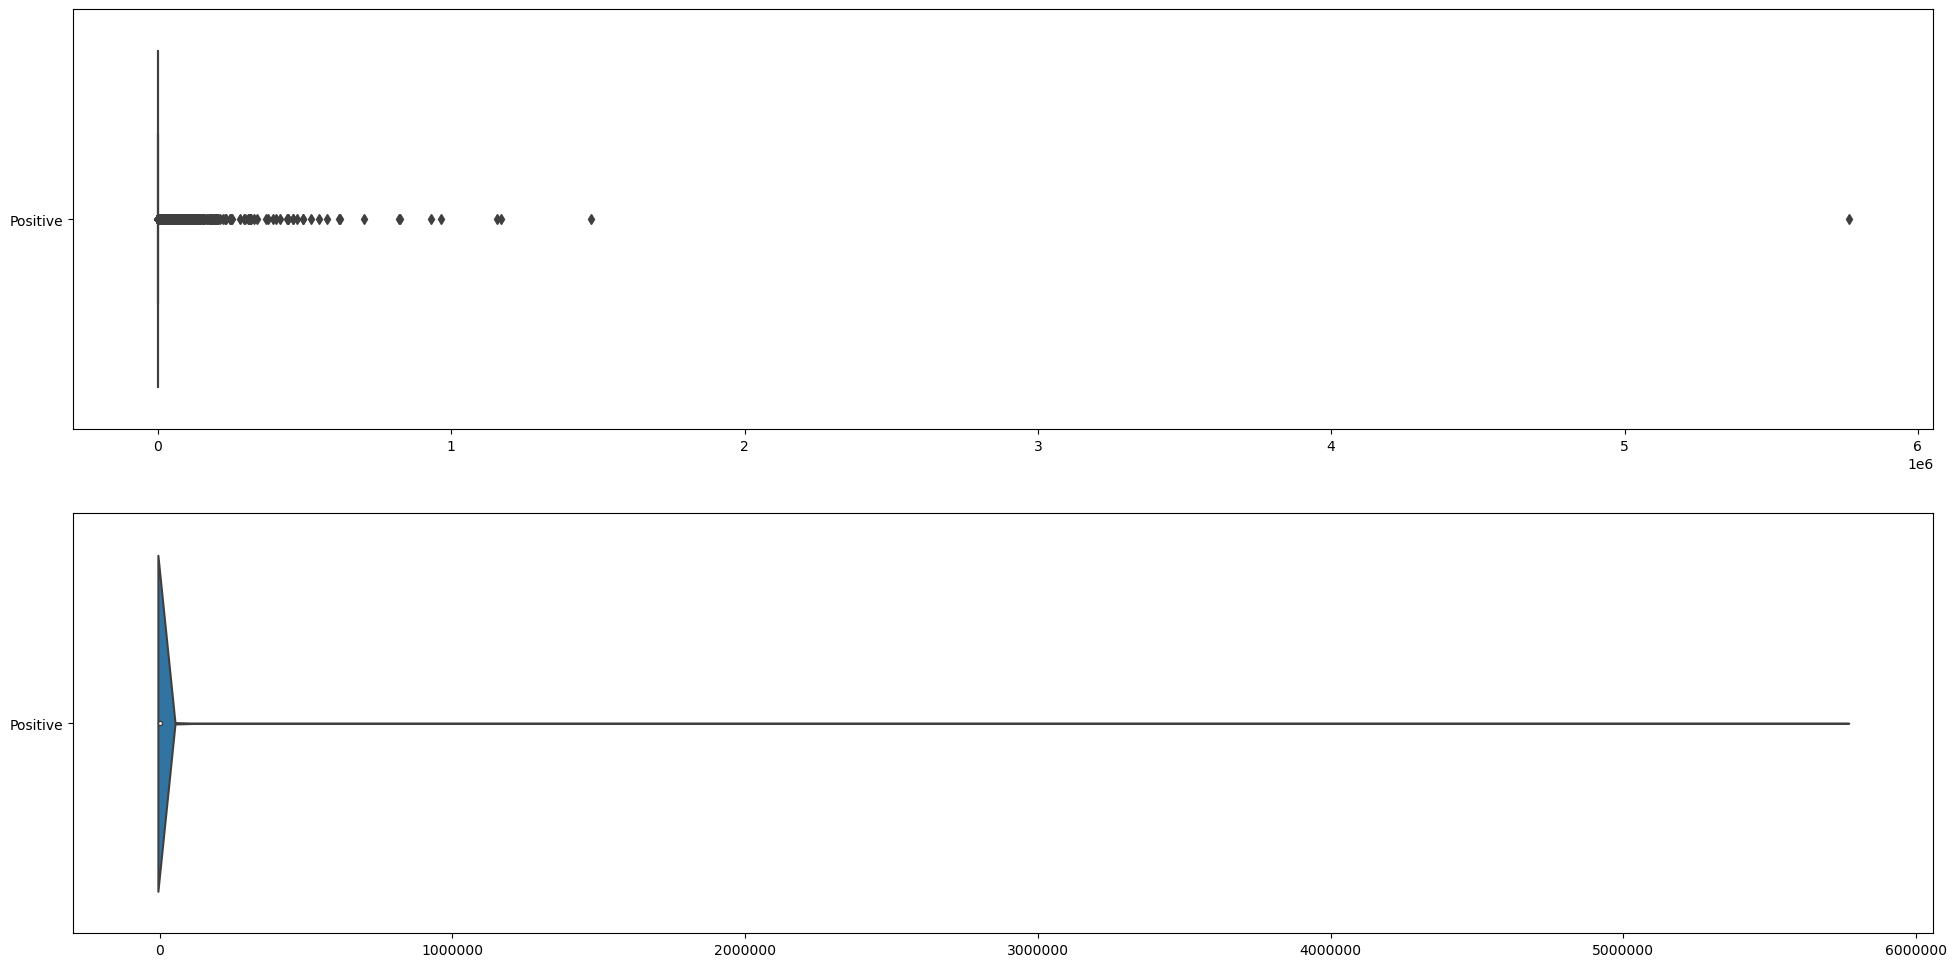

In [170]:
f, axes = plt.subplots(2, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = posRate, orient = "h", ax = axes[0])
# sb.histplot(data = posRate, ax = axes[1])
sb.violinplot(data = posRate, orient = "h", ax = axes[1])

<AxesSubplot:>

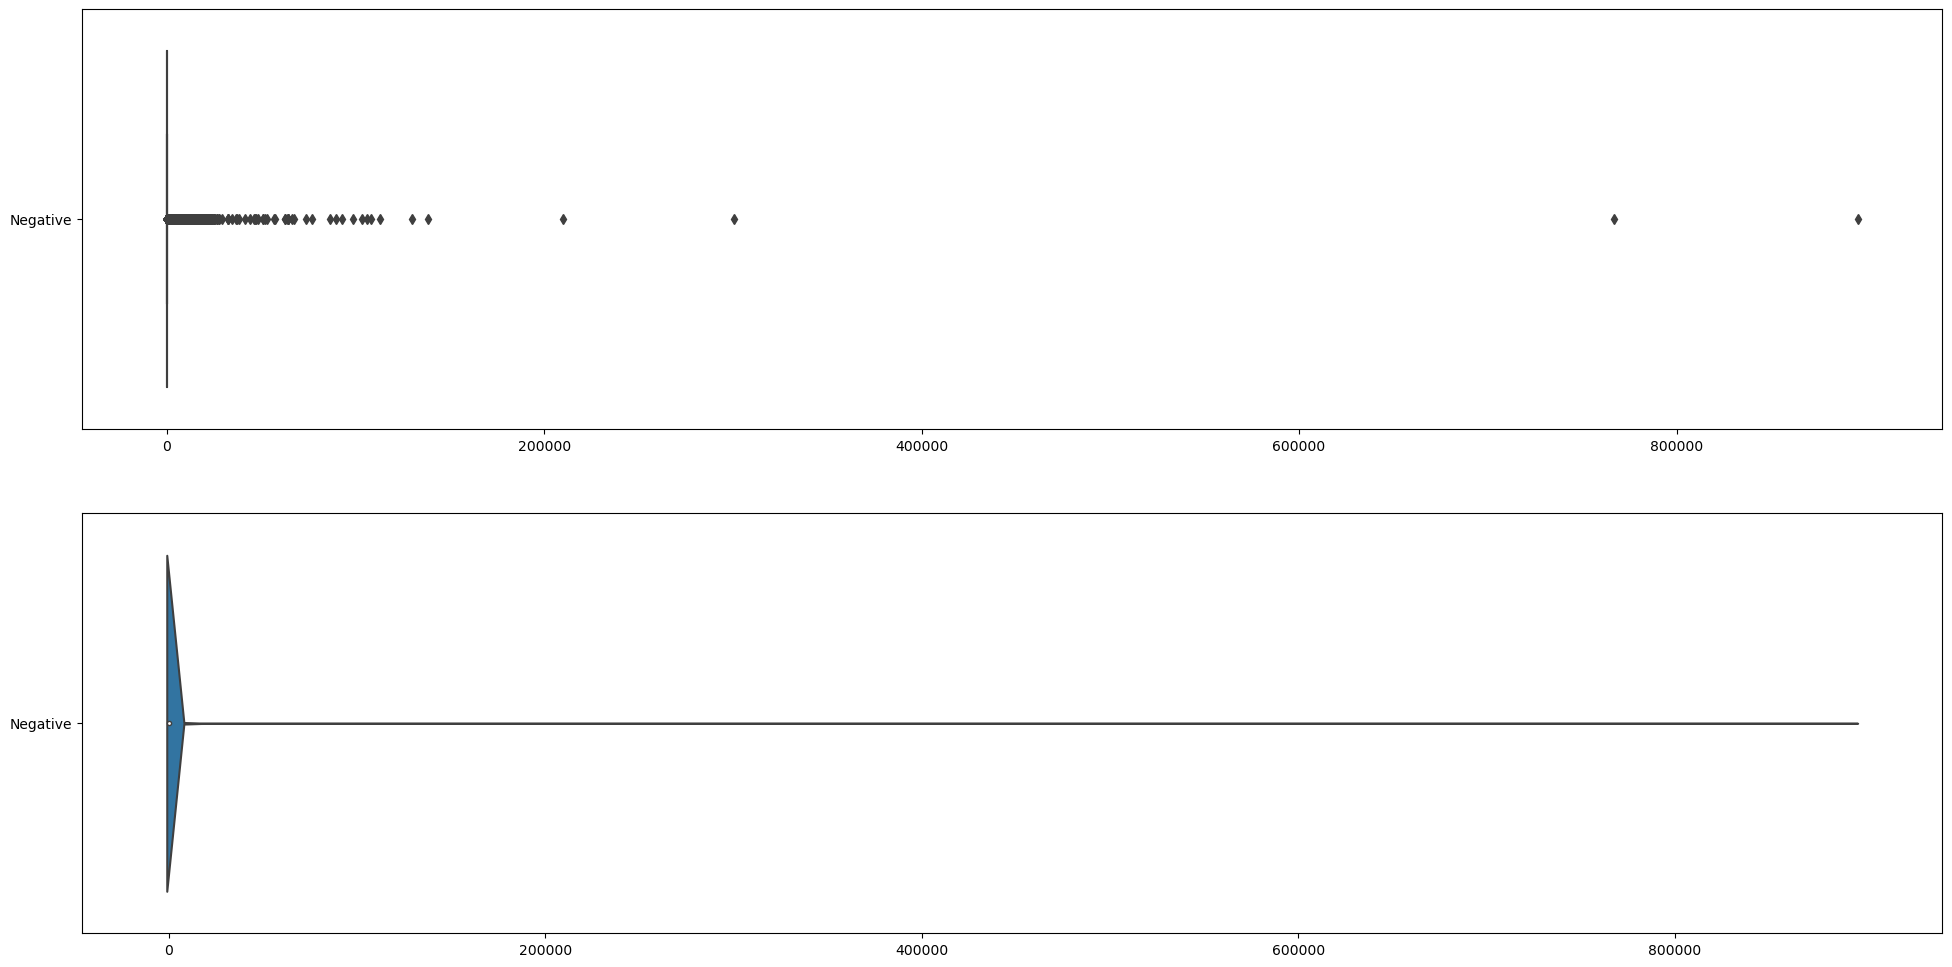

In [171]:
f, axes = plt.subplots(2, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = negRate, orient = "h", ax = axes[0])
# sb.histplot(data = negRate, ax = axes[1])
sb.violinplot(data = negRate, orient = "h", ax = axes[1])

In [172]:
cat_price = pd.DataFrame(game_data[["Name", "Price", "Categories"]])
category = pd.DataFrame(game_data["Categories"])
u_cat = cat_price["Categories"].unique()
print(cat_price["Categories"].describe())
print(len(u_cat))

count             66614
unique             5149
top       Single-player
freq              19375
Name: Categories, dtype: object
5150


In [173]:
cat_list = []
for i in u_cat:
    try:
        arr = i.split(",")
    except:
        print(i)
    for j in arr:
        if j not in cat_list:
            cat_list.append(j)

print(cat_list)

nan
['Single-player', 'Multi-player', 'Steam Achievements', 'Partial Controller Support', 'Full controller support', 'Steam Leaderboards', 'Remote Play on Phone', 'Remote Play on Tablet', 'Remote Play on TV', 'MMO', 'PvP', 'Online PvP', 'Co-op', 'Online Co-op', 'In-App Purchases', 'Steam Cloud', 'Steam Trading Cards', 'Shared/Split Screen', 'Cross-Platform Multiplayer', 'Remote Play Together', 'Stats', 'Shared/Split Screen PvP', 'Captions available', 'Steam Workshop', 'Includes level editor', 'LAN PvP', 'LAN Co-op', 'Shared/Split Screen Co-op', 'Steam Turn Notifications', 'VR Support', 'SteamVR Collectibles', 'Valve Anti-Cheat enabled', 'Includes Source SDK', 'Commentary available', 'Mods (require HL2)', 'Mods', 'Tracked Motion Controller Support', 'Tracked Controller Support', 'VR Only', 'VR Supported']


In [174]:
name = pd.DataFrame(game_data["Name"])
cat_price_columns = cat_list

cat_price_columns.insert(0, "Price")
cat_price_columns.insert(0, "Name")

cat_price_table = pd.DataFrame(columns = cat_price_columns)
cat_price_table.head()

,Name,Price,Single-player,Multi-player,Steam Achievements,Partial Controller Support,Full controller support,Steam Leaderboards,Remote Play on Phone,Remote Play on Tablet,...,SteamVR Collectibles,Valve Anti-Cheat enabled,Includes Source SDK,Commentary available,Mods (require HL2),Mods,Tracked Motion Controller Support,Tracked Controller Support,VR Only,VR Supported


In [181]:
a = cat_price.head(1)
json_table = []
cat_price_json = cat_price.to_json(orient='records')
cat_price_json = json.loads(cat_price_json)
hell = cat_price_json[0:1000]

for j in cat_price_json:
    test = {}
    cats = j["Categories"]
    test["Name"] = j["Name"]
    test["Price"] = j["Price"]
    
    if cats != None:
        cats = cats.split(",")
        for i in cats:
            test[i] = "T"
    # else:
    #     print(j)

    
    json_table.append(test)


print(len(json_table))

67138


In [182]:
# ref = pd.json_normalize(json_table)
cat_price_table = pd.DataFrame(json_table)
cat_price_table.shape

(67138, 42)